# Plot HBA SST's

In [50]:
from sst_bst import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [51]:
#input_label = [ f'LBA_{cnt//2}Y' if cnt%2 else f'LBA_{cnt//2}X' for cnt in range(18)]
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
print(input_label)

['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']


In [52]:
sis=range(8*3,8*3+12); #signal inputs
#START_TIME="2022-12-03 00:00:00"
#END_TIME=  "2022-12-05 00:00:00"
#START_TIME="2023-01-12 15:00:00" 
#END_TIME=  "2023-01-13 15:00:00"
#tstep_min=10;
START_TIME="2023-02-02 06:00:00" 
END_TIME=  "2023-02-03 06:00:00"
tstep_min=10;
#bands=range(512) #all bands

In [53]:
filename="HBA_%s_%imin.npy"%(START_TIME,tstep_min)
if True:
    sst=SSTs('sst') #sst directoty
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    D=sst.getData_percentile(tstart,tend,sis,60*tstep_min) 
    print(D.shape)
    np.save(filename,D)
else:
    D=np.load(filename)
    print(D.shape)


Load SST sst/SST_2023-02-02-05-50-58.h5
Load SST sst/SST_2023-02-02-06-50-58.h5
Load SST sst/SST_2023-02-02-07-50-58.h5
Load SST sst/SST_2023-02-02-08-50-58.h5
Load SST sst/SST_2023-02-02-09-50-58.h5
Load SST sst/SST_2023-02-02-10-50-58.h5
Load SST sst/SST_2023-02-02-11-50-58.h5
Load SST sst/SST_2023-02-02-12-50-58.h5
Load SST sst/SST_2023-02-02-13-50-58.h5
Load SST sst/SST_2023-02-02-14-50-58.h5
Load SST sst/SST_2023-02-02-15-50-58.h5
Load SST sst/SST_2023-02-02-16-50-58.h5
Load SST sst/SST_2023-02-02-17-50-58.h5
Load SST sst/SST_2023-02-02-18-50-58.h5
Load SST sst/SST_2023-02-02-19-50-58.h5
Load SST sst/SST_2023-02-02-20-50-58.h5
Load SST sst/SST_2023-02-02-21-50-58.h5
Load SST sst/SST_2023-02-02-22-50-58.h5
Load SST sst/SST_2023-02-02-23-50-58.h5
Load SST sst/SST_2023-02-03-00-50-58.h5
Load SST sst/SST_2023-02-03-01-50-58.h5
Load SST sst/SST_2023-02-03-02-50-58.h5
Load SST sst/SST_2023-02-03-03-50-58.h5
Load SST sst/SST_2023-02-03-04-50-58.h5
Load SST sst/SST_2023-02-03-05-50-58.h5


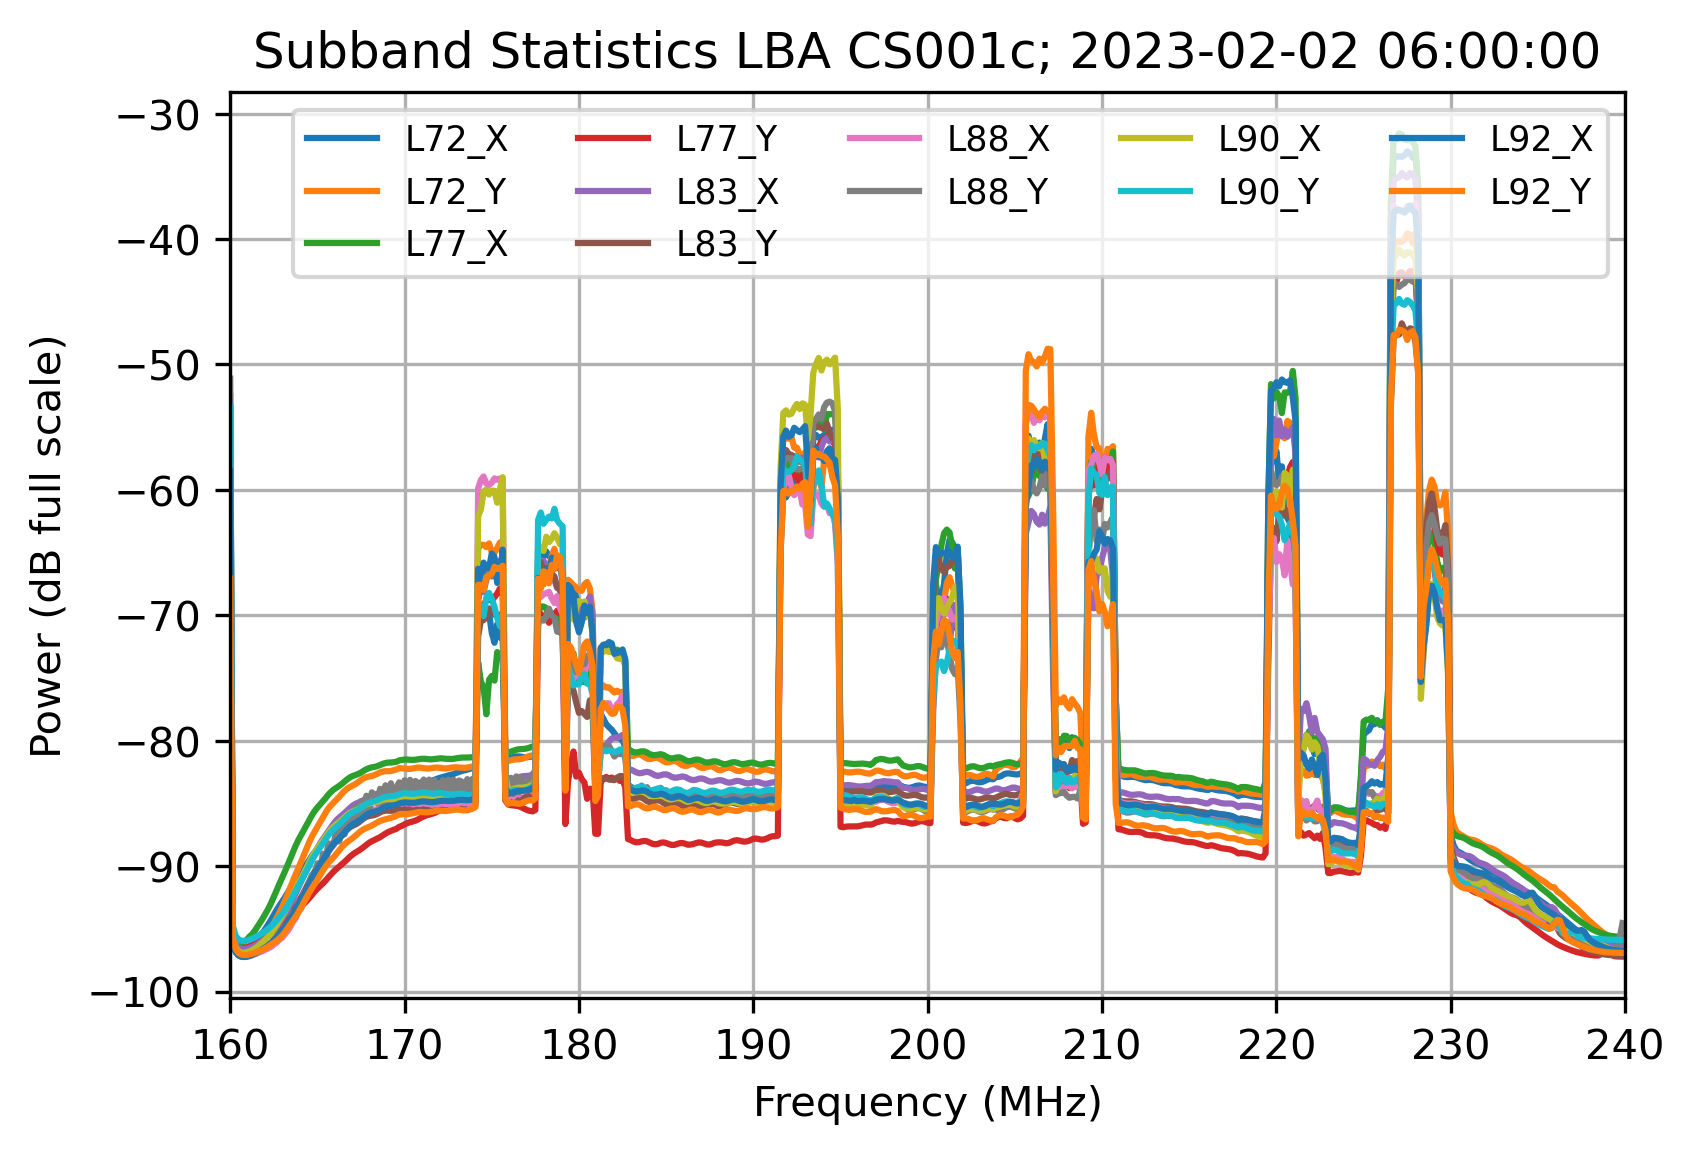

In [54]:
plt.figure(dpi=300)
FS=160
FFT_POINTS=512
STATION_NAME = 'CS001c'
f_as = np.array([160+(FS*cnt)/(2*FFT_POINTS) for cnt in range(FFT_POINTS)])
for cnt, f_si in enumerate(D[1,:,:]):
    plot_data = 10 * np.log10(f_si + 1) - 128 - 6 * 4
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
plt.grid()
plt.xlim([160,240])
#plt.ylim(-88,-80)
plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()

    

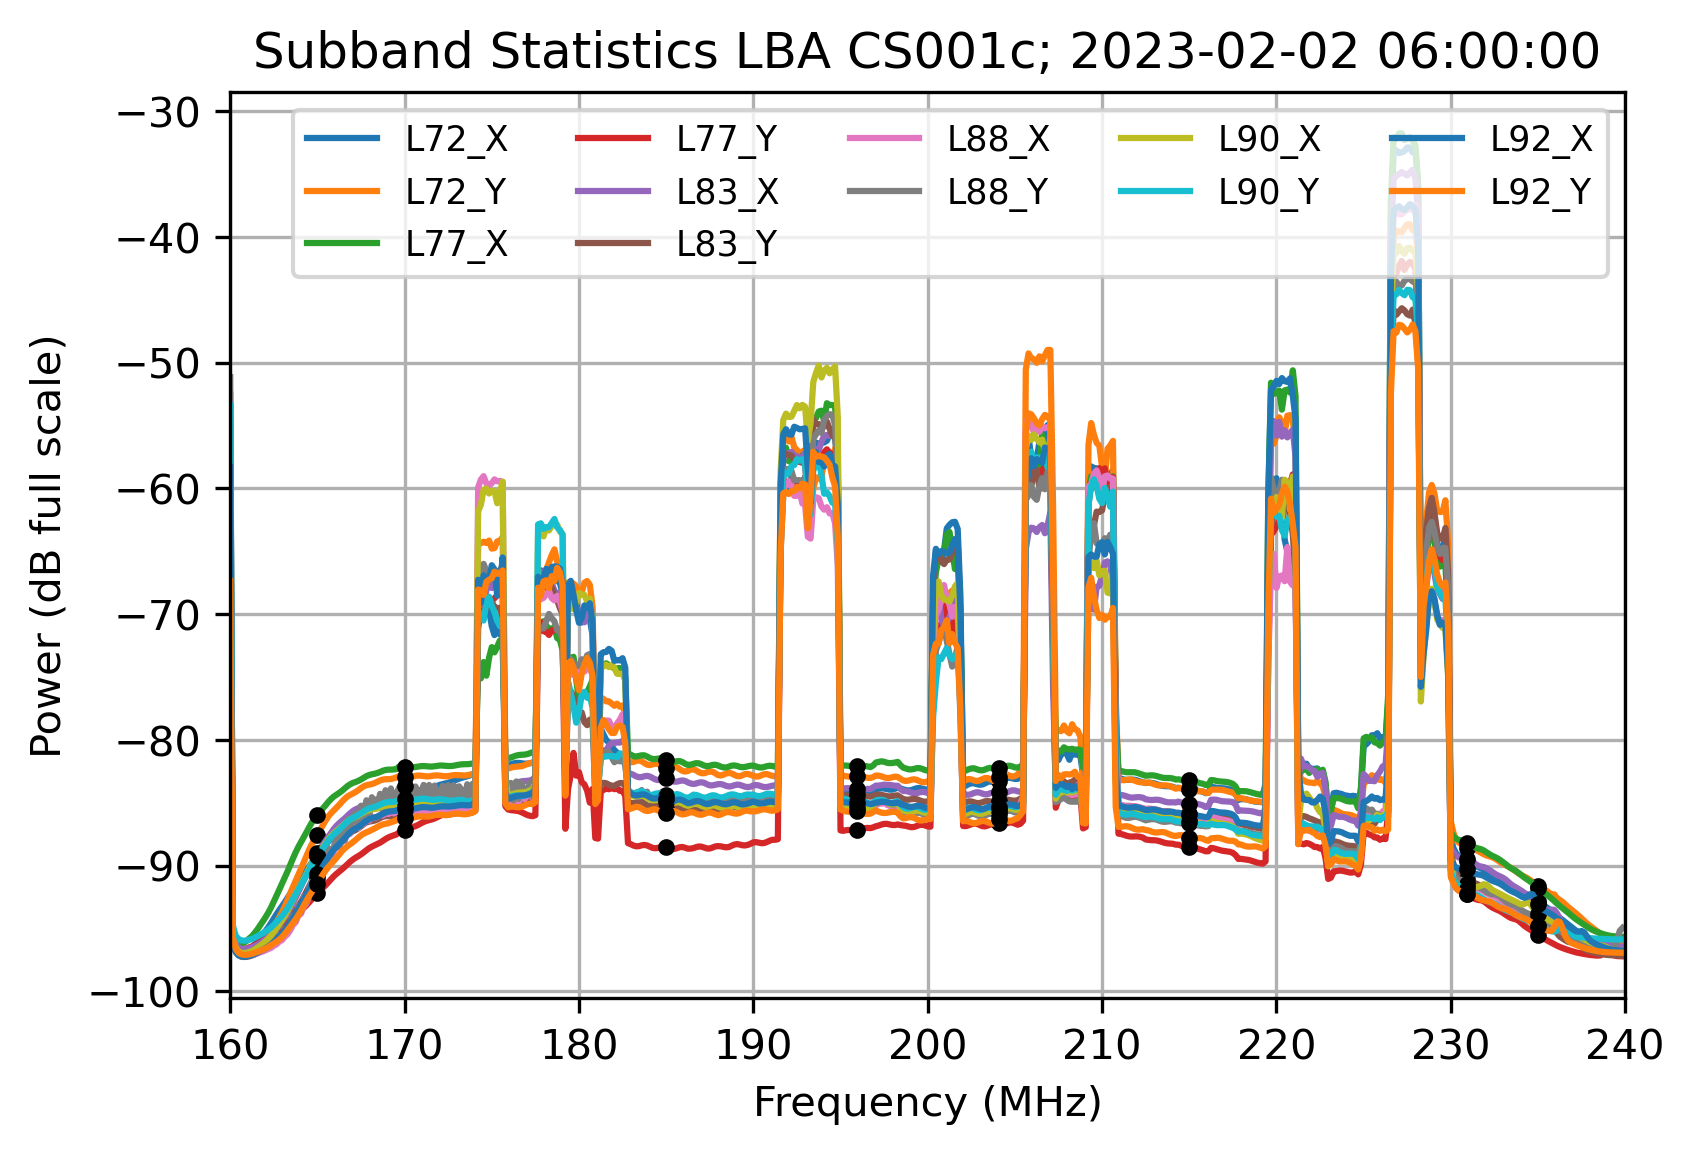

In [55]:
plt.figure(dpi=300)
#freqlist=[207.5,212,218,231,240,253,259.5,264.5,269.2]
freqlist=[165,170,185,196,204,215,231,235]
freqs=160+np.arange(512)/512*80
ifreq=[np.argmin(np.abs(freqs-freq1)) for freq1 in freqlist]

for cnt in range(12):
    plot_data = 10 * np.log10(D[:,cnt,:]) - 128 - 6 * 4
    plot_data=np.percentile(plot_data,50,axis=0)
    plt_label = input_label[cnt]
    plt.plot(f_as, plot_data, label = plt_label)
    plt.plot(f_as[ifreq], plot_data[ifreq], 'k.')
plt.grid()
plt.xlim([160,240])
plt.legend(fontsize='small',ncol=5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dB full scale)")
plt.title(f"Subband Statistics LBA {STATION_NAME}; {START_TIME}")
plt.show()


In [56]:
freqs=160+np.arange(512)/512*80
freq1=170;i1=np.argmin(np.abs(freqs-freq1))
#freq1=10.75;i1=np.argmin(np.abs(freqs-freq1))
#freq1=16.35;i1=np.argmin(np.abs(freqs-freq1))
freq2=185;i2=np.argmin(np.abs(freqs-freq2))
freq3=205;i3=np.argmin(np.abs(freqs-freq3))
#print(i2,i1,freqs[i1],freqs[i2])

In [57]:
#sky=np.load("../L2TS_cal/Sky2022-11-04-16-00-00_40.npy")
#skyhour=np.arange(24*60/60)
#print(sky.shape,len(skyhour))

64 1.3458175608473795 714 1.9833333333333334


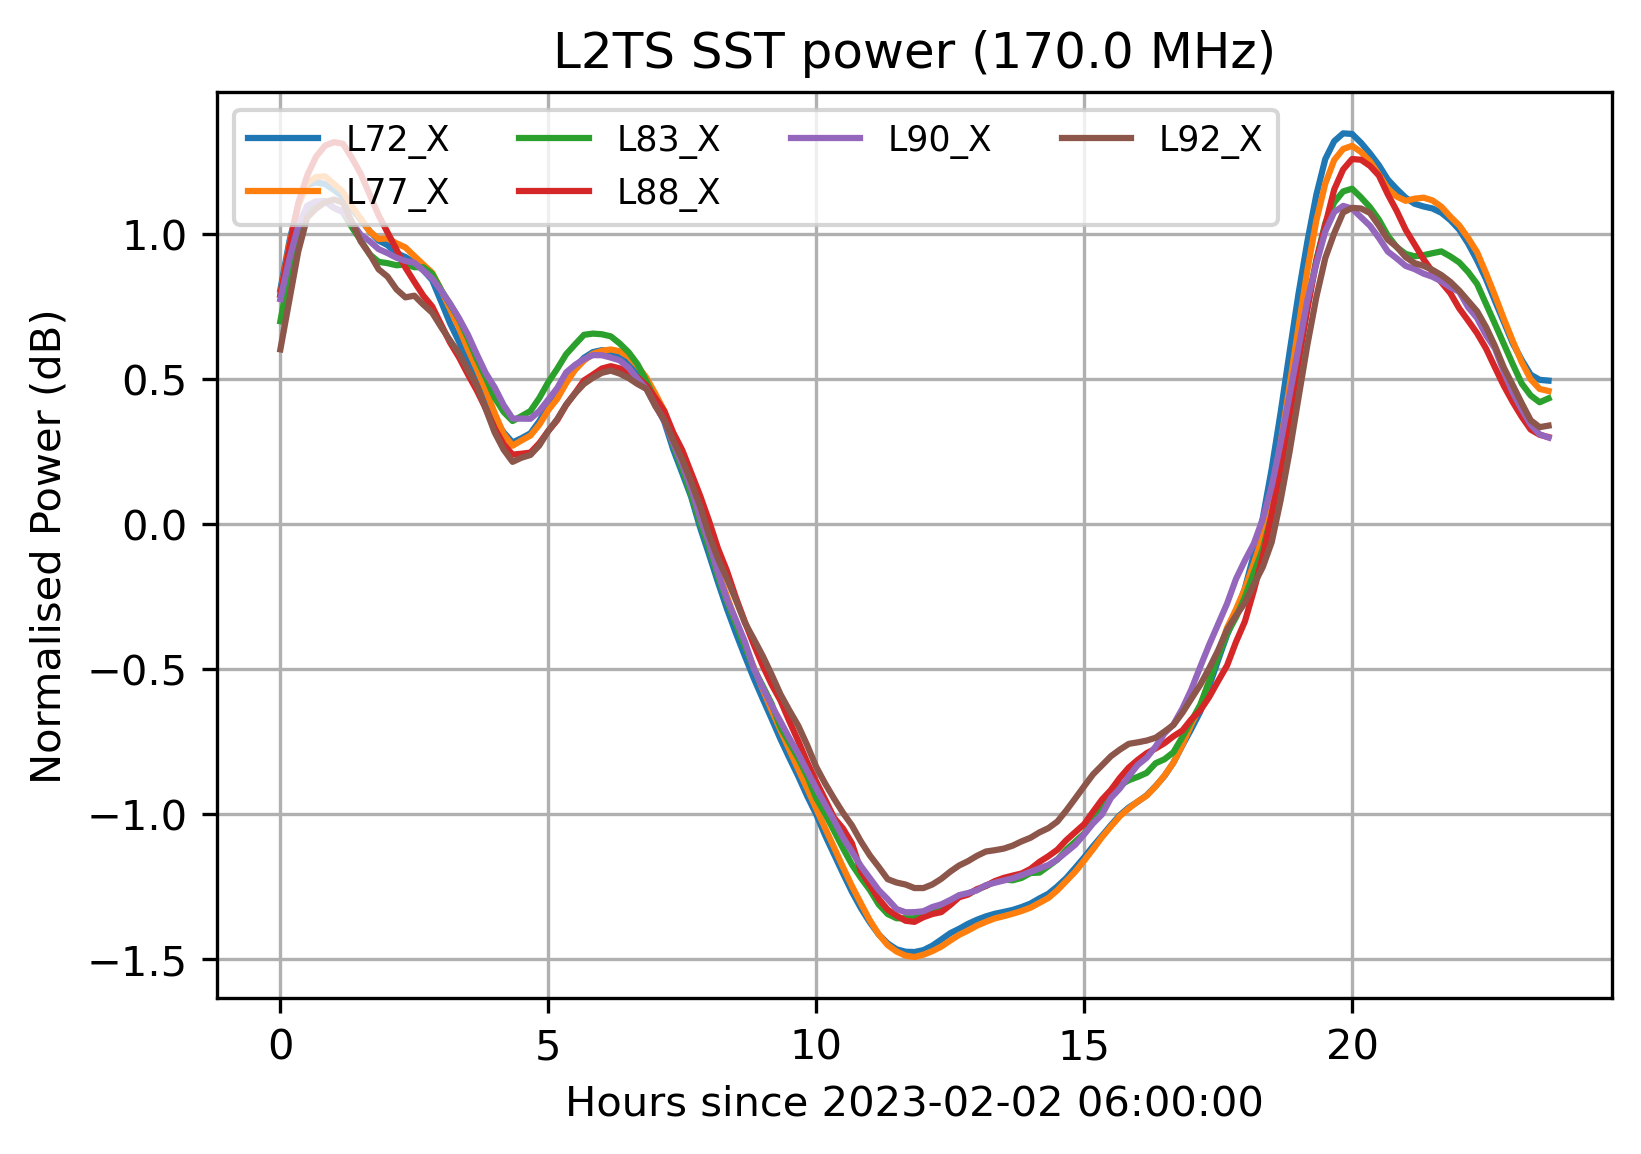

In [58]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/60*tstep_min
for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
    print(i,np.max(Pwr),np.argmax(Pwr),(np.argmax(Pwr))/360)
#plt.xlim(0,24)
#plt.ylim(-60,-40)
#plt.gca().set_prop_cycle(None)
#skyP=10*np.log10(sky[0,:])
#skyP=np.mean(skyP,axis=0)
#skyP-=np.mean(skyP)
#plt.plot(skyhour+1,skyP.T,'k:',linewidth=1,label='Tsky+Antenna Sim')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()
#plt.ylim(-2,-1)

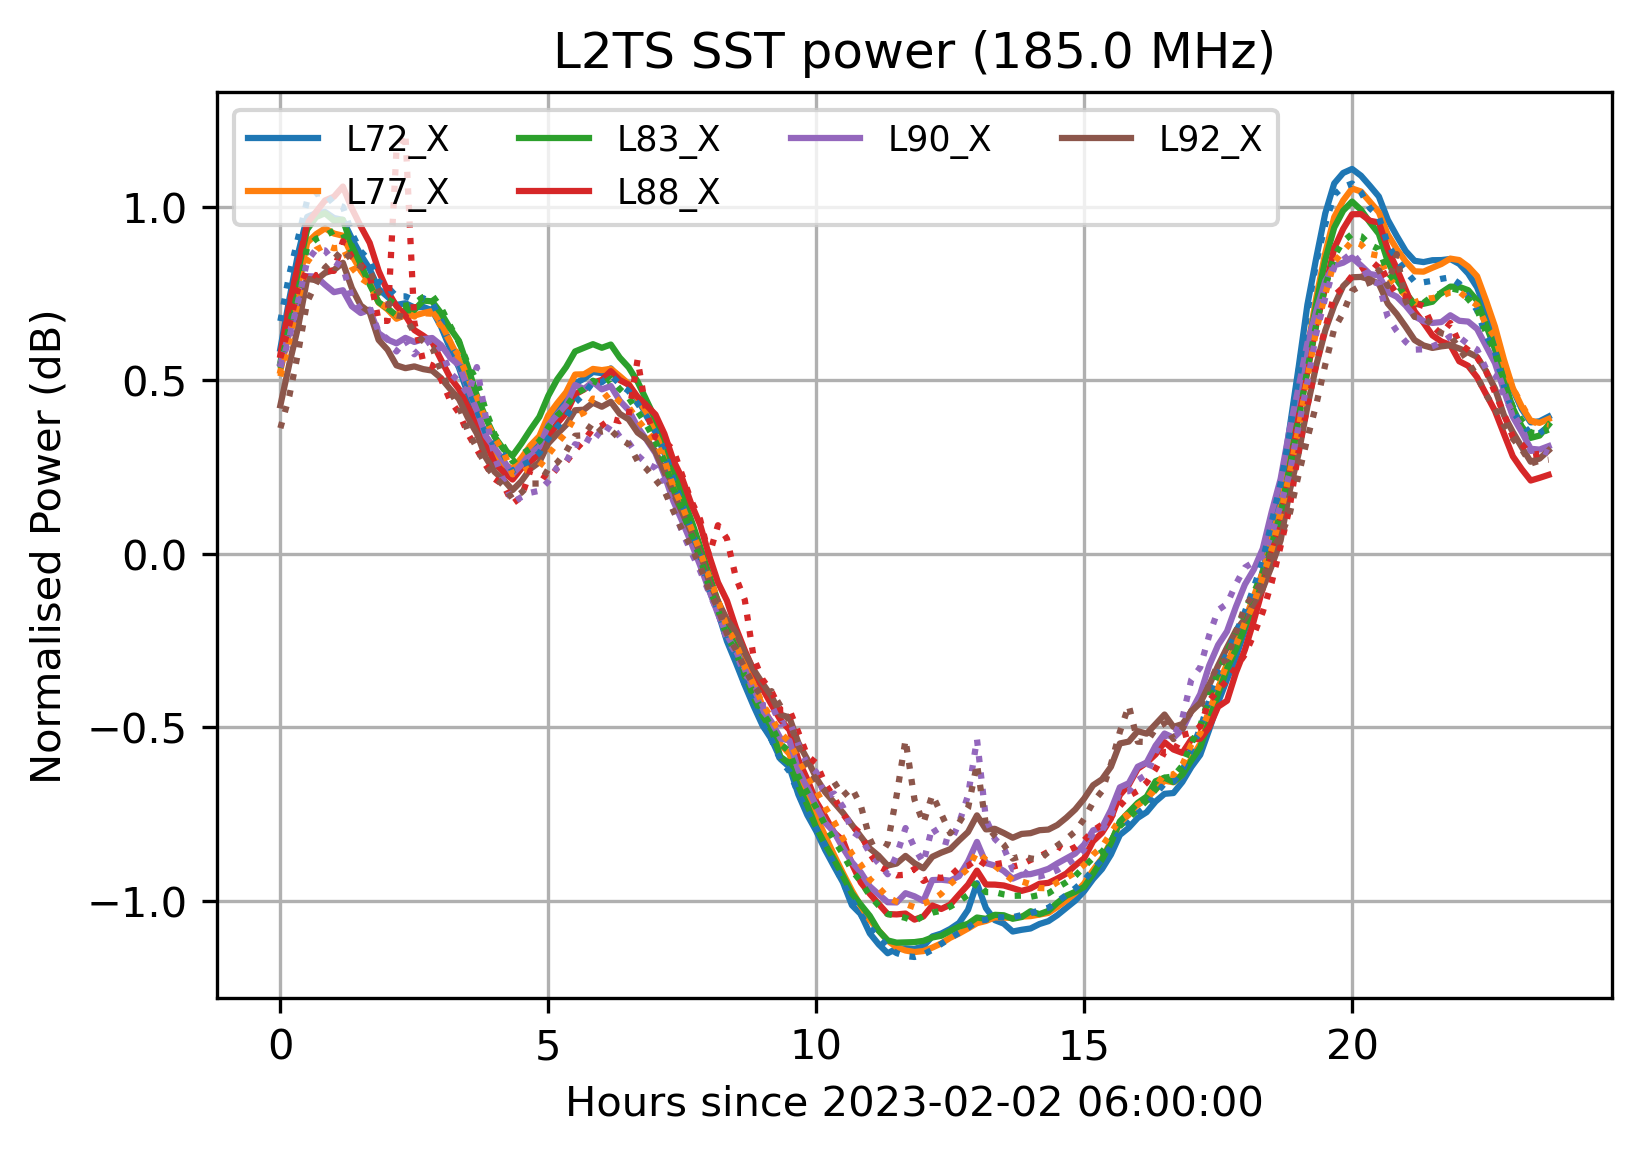

In [59]:
plt.figure(dpi=300)
for i in [i2]:
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],label=input_label[l*2]);
plt.gca().set_prop_cycle(None)
for i in [i2]:
    Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    for l in range(6):
        plt.plot(hour_of_day,Pwr[:,l],':');

plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small',ncol=4)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power (%.1f MHz)"%freqs[i])
plt.grid()

[165, 170, 185, 196, 204, 215, 231, 235]


(-1.5, 4.0)

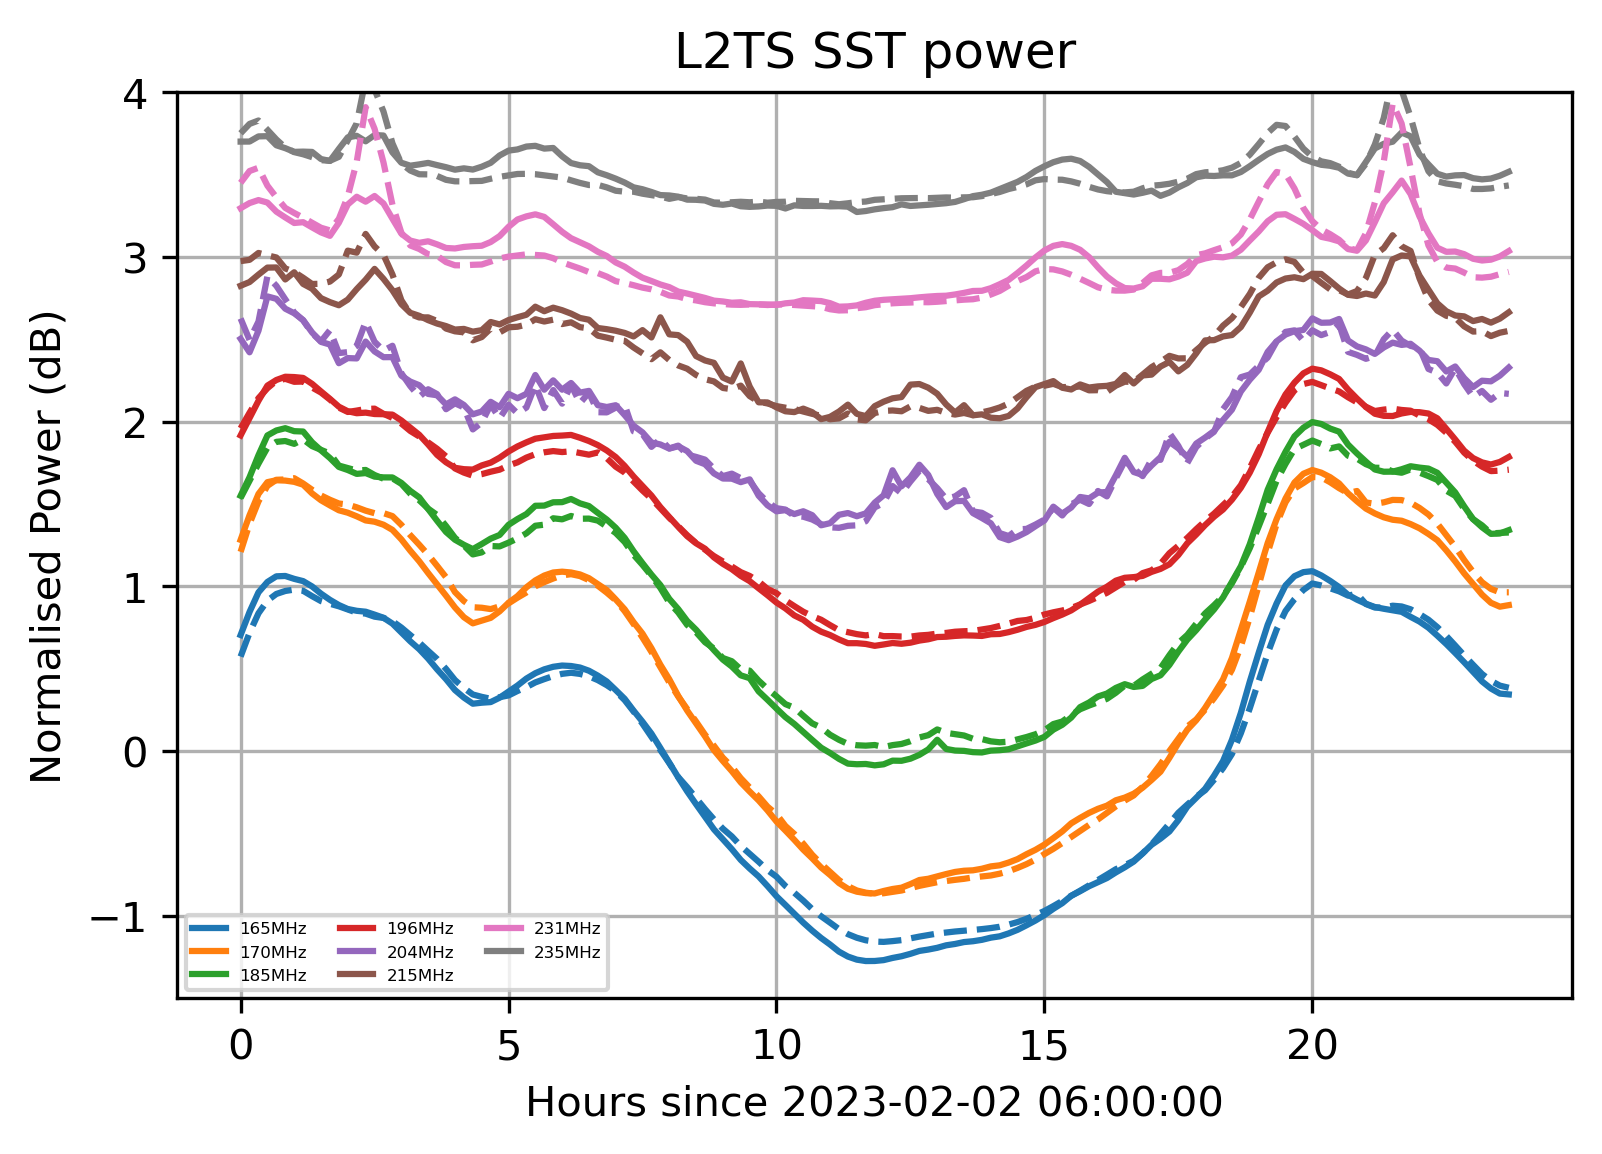

In [60]:
plt.figure(dpi=300)
#freqlist=[x for x in range(110,191,10)]
#freqlist[7]=177
print(freqlist)
for cnt,freq in enumerate(freqlist):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day,Pwr+cnt/2,label='%iMHz'%freq);
#    print(i,np.max(Pwr),istart+np.argmax(Pwr),(istart+np.argmax(Pwr))/360)
plt.gca().set_prop_cycle(None)
#for cnt,freq in enumerate(range(40,85,5)):
for cnt,freq in enumerate(freqlist):
#for i in range(6):
    i=np.argmin(np.abs(freqs-freq))
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Pwr=(10*np.log10(D[:,1::2,i]))-GainADC
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    Pwr=np.percentile(Pwr,50,axis=1)
    plt.plot(hour_of_day[:],Pwr+cnt/2,'--');


#skyhour=np.arange(25*60/15)/4
#for cnt,freq in enumerate(range(40,85,5)):
#    sky=np.load("../L2TS_cal/Sky2022-11-04-15-00-00_%iMHz.npy"%freq)
#    skyP=10*np.log10(sky[0,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour,skyP.T+cnt,'k:',linewidth=1)
#
#    skyP=10*np.log10(sky[1,:])
#    skyP-=np.mean(skyP)
#    plt.plot(skyhour-1,skyP.T+cnt,'k:',linewidth=1)
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize=4,ncol=3)
plt.xlabel('Hours since ' + START_TIME)
plt.title("L2TS SST power")
plt.grid()
#plt.xlim(0,23)
plt.ylim(-1.5,4.0)

Text(0.5, 1.0, ' Spectrogam of HBA input nr L88_X')

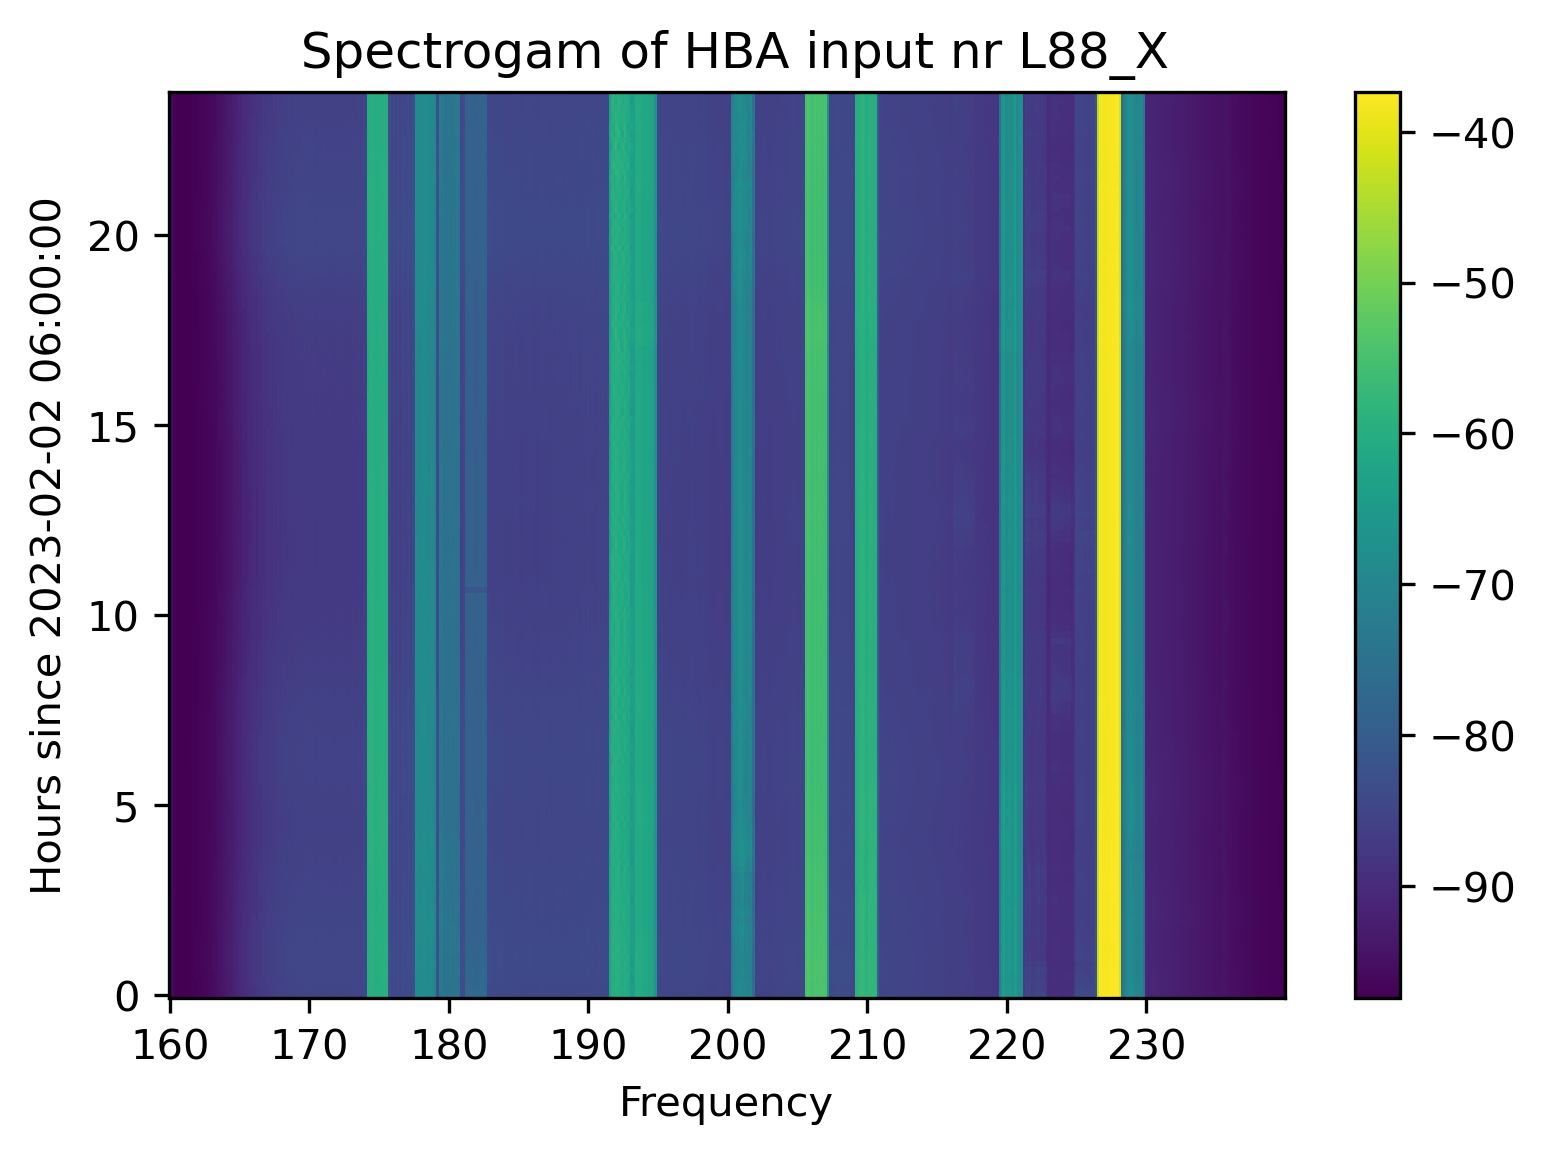

In [61]:
lba_si_nr = 6
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.title(f" Spectrogam of HBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")

Text(0.5, 1.0, ' Spectrogam of LBA input nr L72_X')

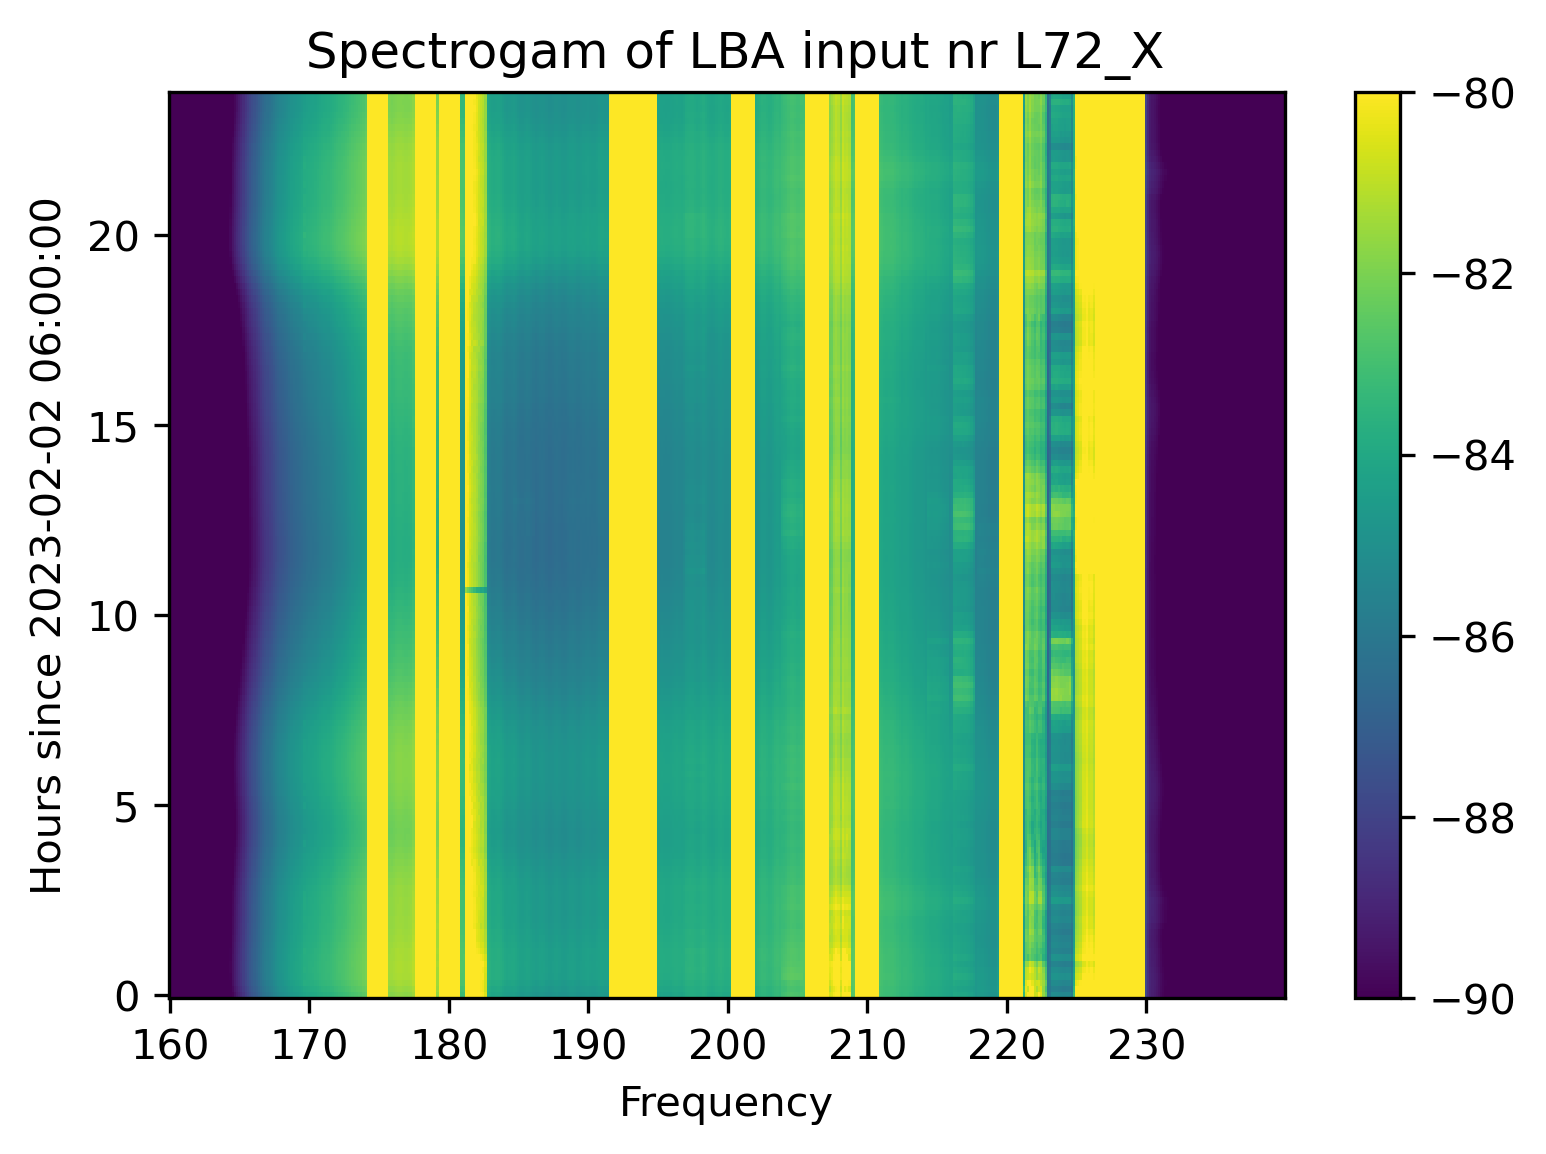

In [63]:
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freqs, yas, 10*np.log10(D[:,lba_si_nr,:])-GainADC) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-90, -80])
plt.title(f" Spectrogam of LBA input nr {input_label[lba_si_nr]}")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.xlim(16,18)

Text(0.5, 1.0, '5 avaraged time slices of L72_Y from 2023-02-02 06:00:00')

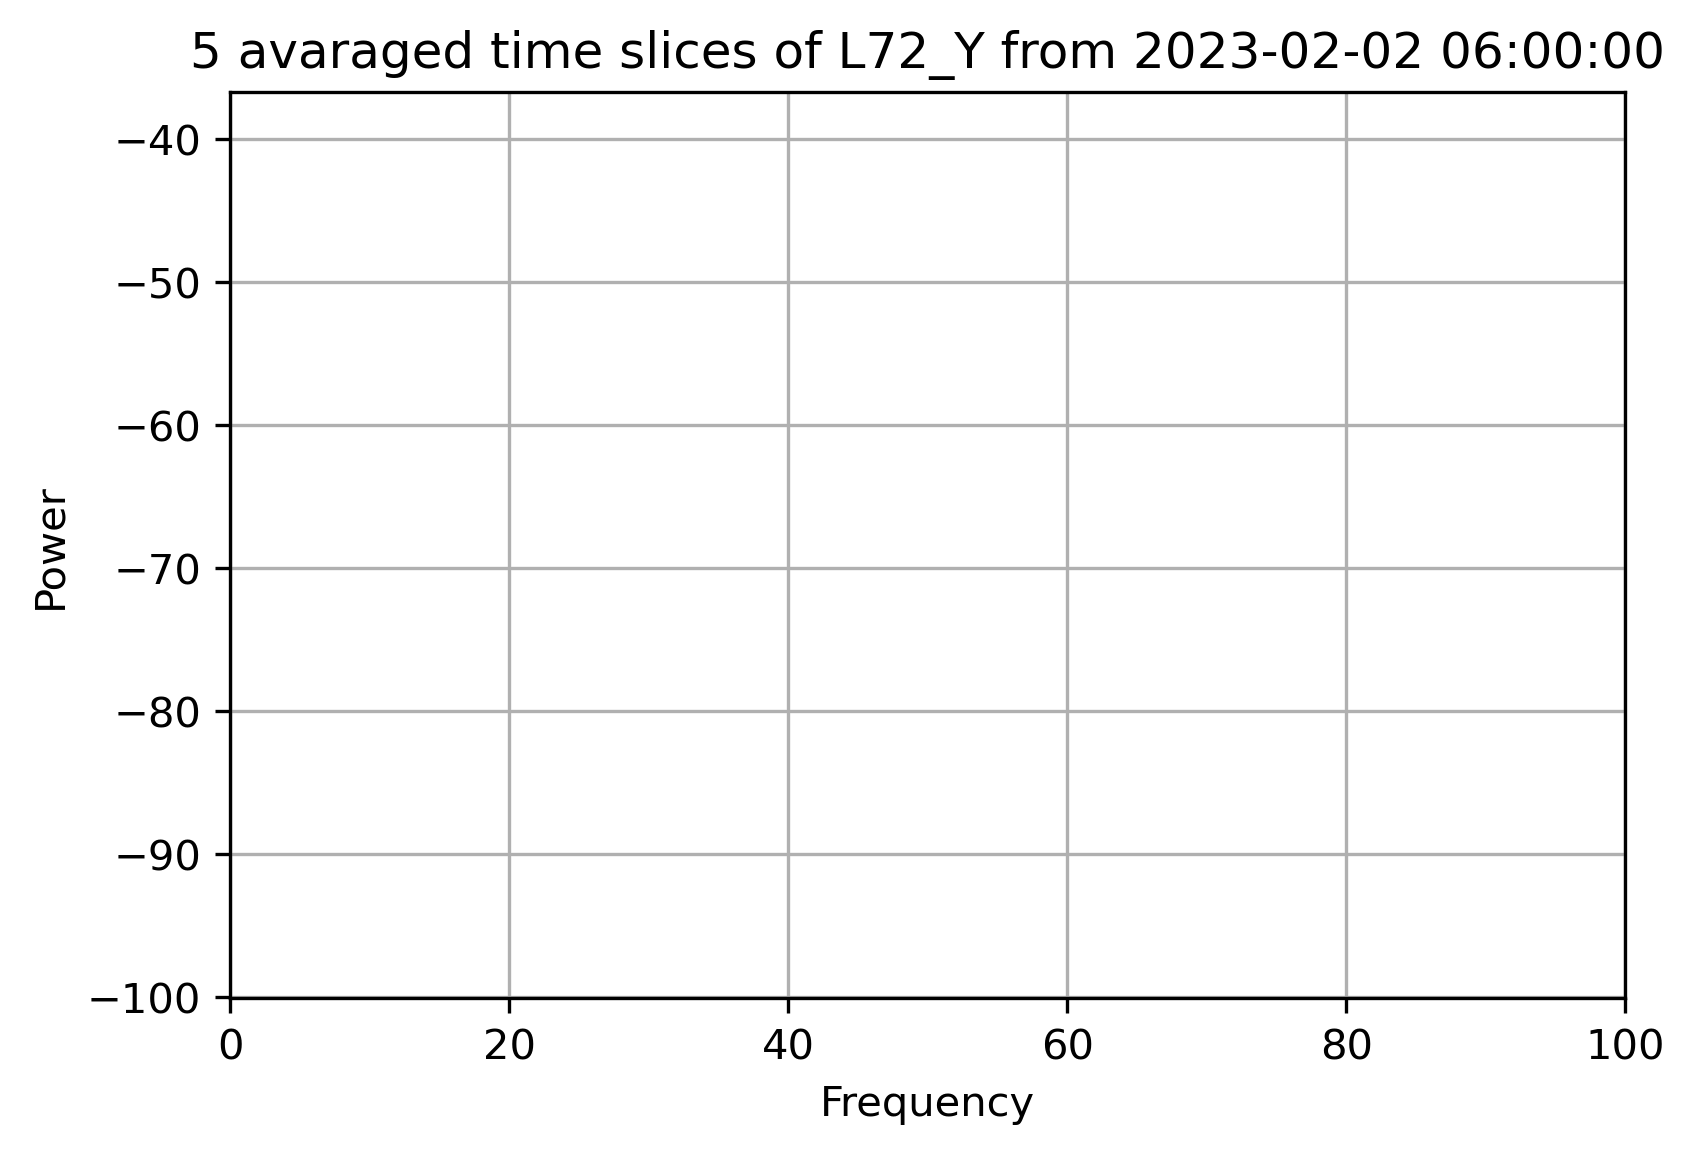

In [37]:
si = 1
slices = 5
pwr3=10*np.log10(D[:,si,:])-GainADC
plt.figure(dpi=300)
for x in range(slices):
    plt.plot(f_as, np.mean(pwr3[(x*10+0):(x*10+10)],axis=0),linewidth=0.5)
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim([0, 100])
plt.title(f'{slices} avaraged time slices of {input_label[si]} from {START_TIME}')